In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utilities.common import FEATURES 

pd.set_option('display.max_rows', None)

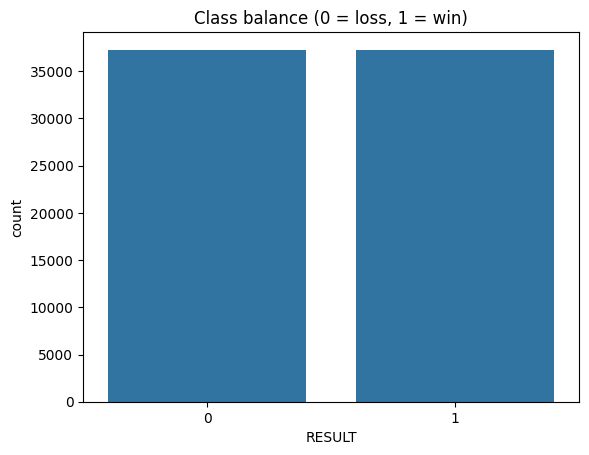

In [2]:
df = pd.read_csv('../data/processed/Training_Data.csv')

sns.countplot(x='RESULT', data=df)
plt.title('Class balance (0 = loss, 1 = win)')
plt.show()

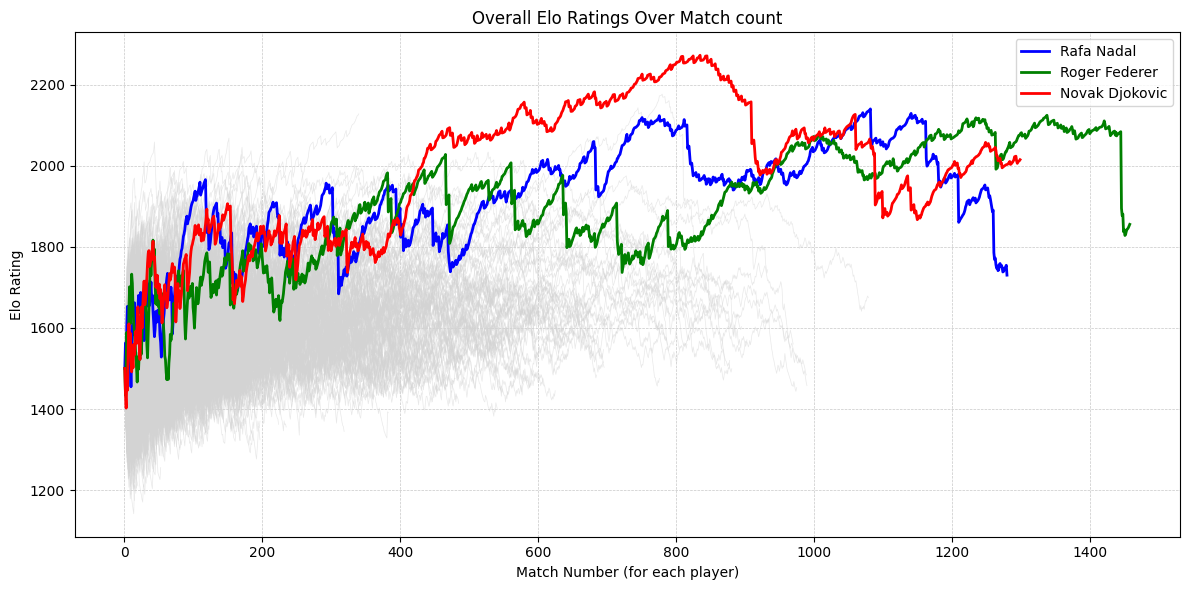

In [3]:
nadal_id    = 104745
federer_id = 103819
djokovic_id= 104925

highlight = {
    nadal_id:    ("Rafa Nadal",    "blue"),
    federer_id: ("Roger Federer", "green"),
    djokovic_id:("Novak Djokovic","red")
}

df_p1 = df[['P1_ID','P1_ELO']].rename(
    columns={'P1_ID':'player_id','P1_ELO':'elo'}
)
df_p2 = df[['P2_ID','P2_ELO']].rename(
    columns={'P2_ID':'player_id','P2_ELO':'elo'}
)


df_p1['global_match_idx'] = df_p1.index
df_p2['global_match_idx'] = df_p2.index

df_long = pd.concat([df_p1, df_p2], ignore_index=True)
df_long = df_long.sort_values('global_match_idx')
df_long['player_match_num'] = df_long.groupby('player_id').cumcount() + 1

plt.figure(figsize=(12,6))

for pid, grp in df_long.groupby('player_id'):
    if pid in highlight:
        continue
    plt.plot(
        grp['player_match_num'],
        grp['elo'],
        color='lightgray',
        linewidth=0.5,
        alpha=0.5
    )

for pid, (label, col) in highlight.items():
    grp = df_long[df_long['player_id']==pid]
    plt.plot(
        grp['player_match_num'],
        grp['elo'],
        color=col,
        linewidth=2,
        label=label
    )

plt.title("Overall Elo Ratings Over Match count")
plt.xlabel("Match Number (for each player)")
plt.ylabel("Elo Rating")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

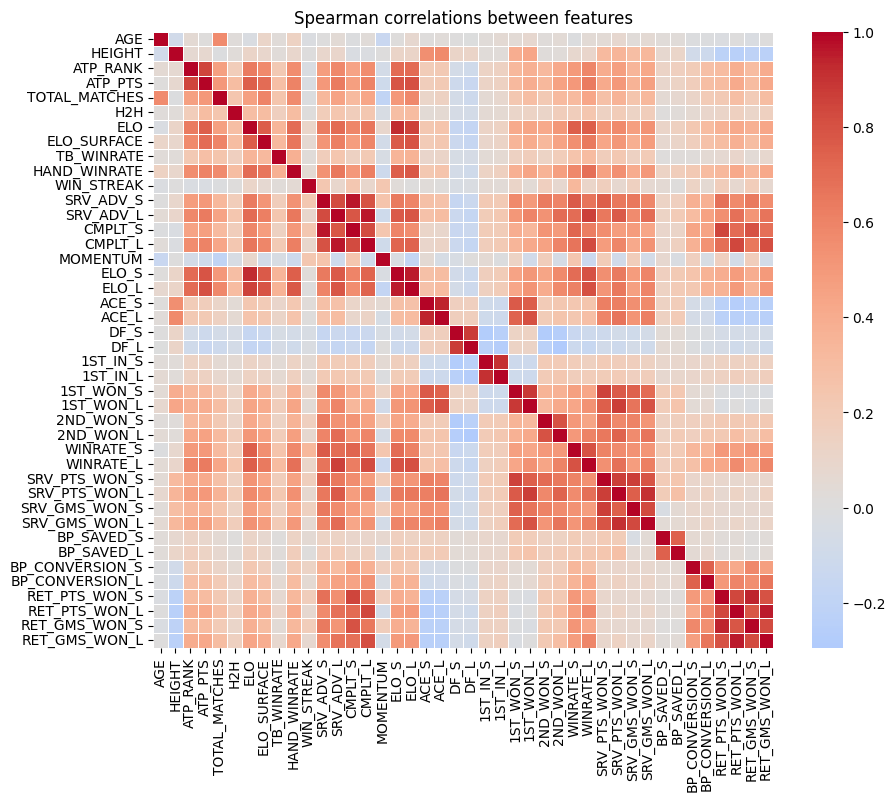

In [4]:
corr = df[FEATURES]
corr = corr.corr(method='spearman') 
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Spearman correlations between features')
plt.show()

In [5]:
corr = df[FEATURES + ["RESULT"]]
abs(corr.corr()['RESULT']).sort_values(ascending=False).head(15)


RESULT           1.000000
ELO_SURFACE      0.364967
ELO              0.352563
ATP_PTS          0.303445
HAND_WINRATE     0.277798
WINRATE_L        0.275996
ELO_S            0.275225
ELO_L            0.271305
WINRATE_S        0.259298
CMPLT_L          0.257099
CMPLT_S          0.250778
SRV_GMS_WON_L    0.241567
SRV_GMS_WON_S    0.232792
SRV_ADV_L        0.208585
TOTAL_MATCHES    0.207073
Name: RESULT, dtype: float64

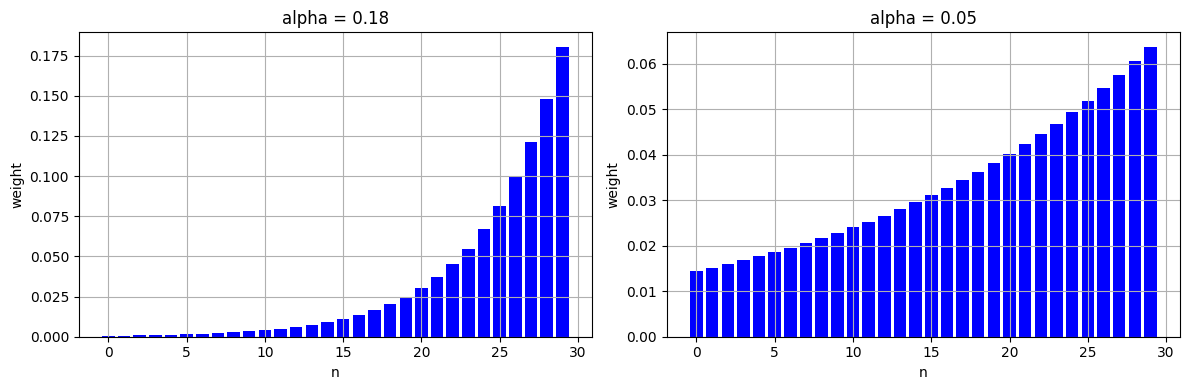

In [6]:
def ewma_weights(alpha, size):
    return (1 - alpha) ** np.arange(size - 1, -1, -1) * alpha


size = 30  
alphas = [0.18, 0.05]
halflives = [np.log(2) / a for a in alphas]

plt.figure(figsize=(12, 4))
for i, (alpha, hl) in enumerate(zip(alphas, halflives), 1):
    weights = ewma_weights(alpha, size)
    weights /= weights.sum() 
    
    plt.subplot(1, 2, i)
    plt.bar(range(size), weights, color='blue')
    plt.title(f"alpha = {alpha}")
    plt.xlabel("n")
    plt.ylabel("weight")
    plt.grid(True)

plt.tight_layout()
plt.show()